<a href="https://colab.research.google.com/github/currencyfxjle/Text_Sentiment_Analysis/blob/main/Analitica_de_Texto_JoseLizarraga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalación de bibliotecas necesarias (descomentar si es necesario instalarlas)
!pip install nltk wordcloud textblob matplotlib pandas scikit-learn

In [ ]:
df.columns

Index(['id', 'text', 'timestamp', 'source', 'symbols', 'company_names', 'url',
       'verified', 'processed_text', 'text_length', 'sentiment'],
      dtype='object')

In [ ]:
df.head(5)

,id,text,timestamp,source,symbols,company_names,url,verified,processed_text,text_length,sentiment
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True,video offic mind busi solomon tell gs intern l...,10,0.000000
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True,price lumber sinc hit ytd high maci turnaround...,10,0.160000
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True,say american dream dead https,5,-0.100000
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True,barri silbert extrem optimist bitcoin predict ...,11,0.136364
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True,satellit avoid attack space junk circl earth h...,11,0.000000


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


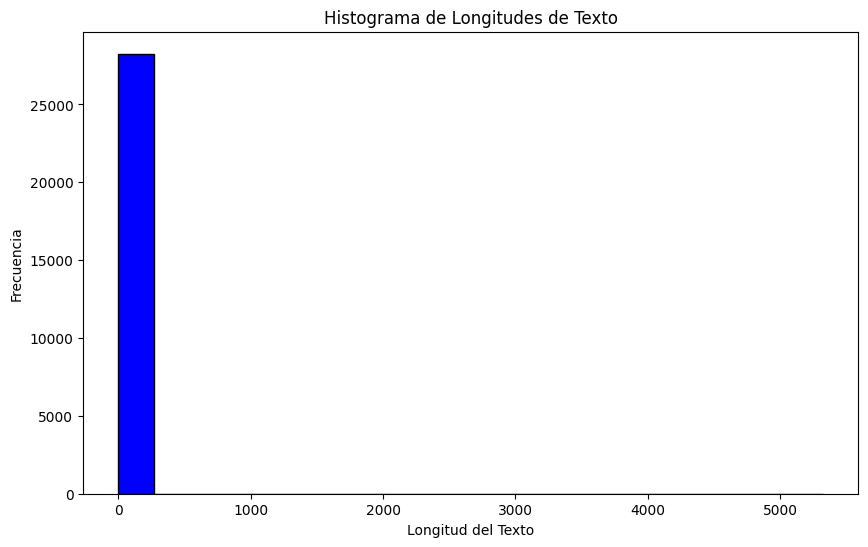

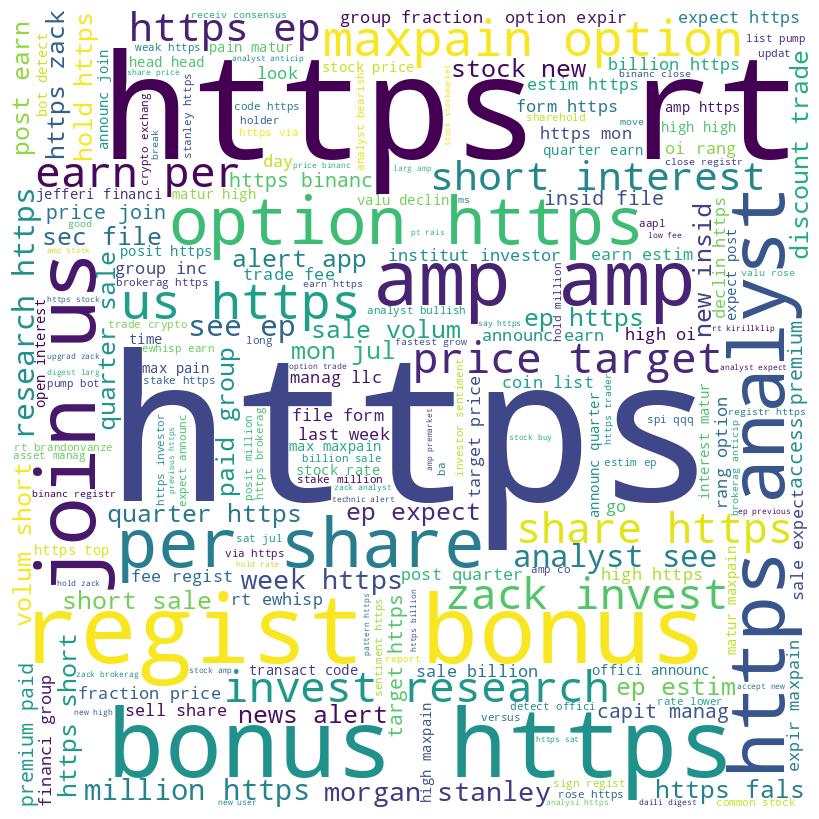

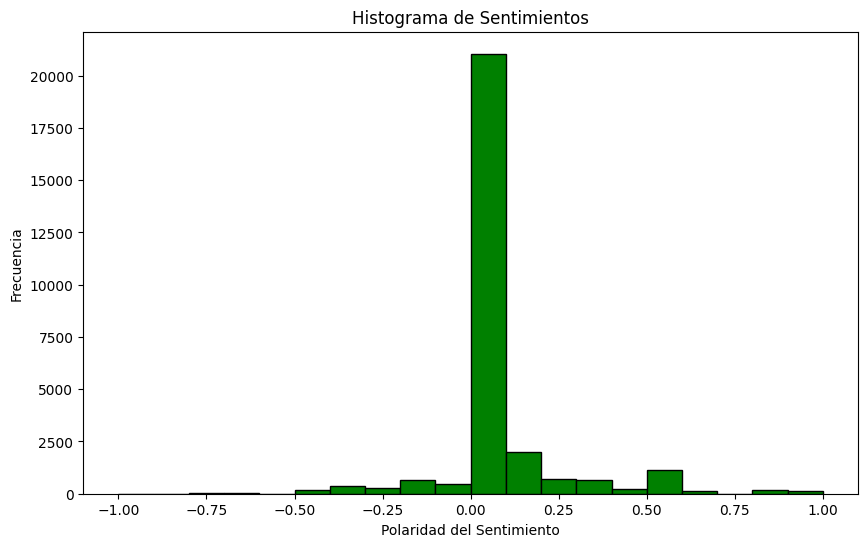

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.manifold import TSNE

# Descargar recursos NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el dataset
df = pd.read_csv('stockerbot-export.csv', on_bad_lines='skip')

# Preparación y creación del corpus
# Procesamiento básico de textos
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def process_text(text):
    # Tokenización
    tokens = word_tokenize(text.lower())
    # Stemming y eliminación de stopwords
    stemmed = [stemmer.stem(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(stemmed)

df['processed_text'] = df['text'].apply(process_text)

# Cálculo de frecuencias de longitudes de texto y palabras más comunes
df['text_length'] = df['processed_text'].apply(lambda x: len(x.split()))

# Histograma de longitudes de texto
plt.figure(figsize=(10,6))
plt.hist(df['text_length'], bins=20, color='blue', edgecolor='black')
plt.title('Histograma de Longitudes de Texto')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

# WordCloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white').generate(' '.join(df['processed_text']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Análisis de Sentimientos
df['sentiment'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Histograma de Sentimientos
plt.figure(figsize=(10,6))
plt.hist(df['sentiment'], bins=20, color='green', edgecolor='black')
plt.title('Histograma de Sentimientos')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


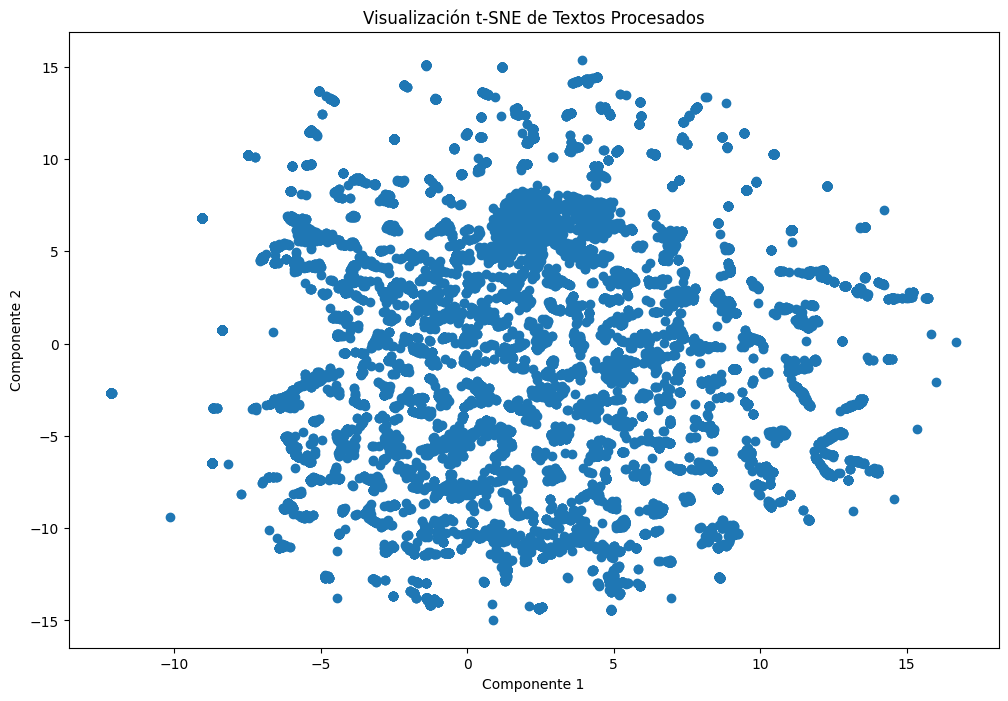

In [ ]:
# Continuar desde el análisis de sentimientos

# Importar las bibliotecas necesarias para TF-IDF y t-SNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# TF-IDF
vectorizer = TfidfVectorizer(max_features=100)  # Ajusta el número de características según sea necesario
X_tfidf = vectorizer.fit_transform(df['processed_text']).toarray()

# Aplicar t-SNE
tsne_model = TSNE(n_components=2, perplexity=40, n_iter=300, random_state=23)
X_tsne = tsne_model.fit_transform(X_tfidf)

# Para visualización, convertir el resultado de t-SNE a un DataFrame para una mejor manipulación
df_tsne = pd.DataFrame(data = X_tsne, columns = ['Componente 1', 'Componente 2'])

# Gráfica de t-SNE
plt.figure(figsize=(12, 8))
plt.scatter(df_tsne['Componente 1'], df_tsne['Componente 2'])
plt.title('Visualización t-SNE de Textos Procesados')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


**El código determina la polaridad del sentimiento de cada texto procesado utilizando la librería TextBlob.** TextBlob es una biblioteca de procesamiento de lenguaje natural (NLP) para Python que simplifica el análisis de texto, ofreciendo una interfaz sencilla para tareas comunes de NLP, incluyendo el análisis de sentimientos.

Cuando el código aplica TextBlob(x).sentiment.polarity a cada texto procesado, realiza los siguientes pasos para determinar la polaridad del sentimiento:

**Análisis de texto:** TextBlob procesa el texto proporcionado para entender su estructura y contenido. Esto incluye analizar la gramática, las palabras utilizadas y su contexto dentro del texto.

**Evaluación de sentimientos:** Utiliza un modelo preentrenado de análisis de sentimientos que ha sido entrenado en un gran corpus de texto etiquetado con sentimientos. Este modelo evalúa las palabras y frases del texto para determinar la polaridad general del sentimiento.

**Cálculo de polaridad:** La polaridad es un valor numérico que indica la naturaleza del sentimiento expresado en el texto. Este valor puede variar de -1.0 a 1.0, donde -1.0 representa un sentimiento extremadamente negativo, 0 representa neutralidad, y 1.0 representa un sentimiento extremadamente positivo. El modelo asigna una puntuación de polaridad al texto basándose en la presencia y combinación de palabras que típicamente connotan ciertos sentimientos.

**Resultado:** El valor de polaridad calculado se asigna a cada texto, lo cual permite una interpretación cuantitativa del sentimiento expresado. Este valor se almacena en la columna sentiment del DataFrame df.

El modelo subyacente utilizado por **TextBlob** para el análisis de sentimientos se basa en listas de palabras que han sido etiquetadas con sus respectivas polaridades (positiva, negativa, neutral) y, posiblemente, su subjetividad. Al combinar la evaluación de estas palabras dentro del contexto del texto, TextBlob puede ofrecer una estimación de la polaridad del sentimiento expresado.

**Es importante notar que**, aunque el análisis de sentimientos con TextBlob puede proporcionar una rápida evaluación del tono emocional de los textos, la precisión puede variar dependiendo de la complejidad del lenguaje, las expresiones idiomáticas, la ironía y otros factores que pueden ser difíciles de interpretar para los modelos basados en reglas o entrenados en datos generales.

In [1]:
# Ahora bien, exploraremos ydataprofiling para entender mejor el dataset

In [ ]:
!pip install numpy==1.23.5 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.12.2 plotnine==0.12.3 yellowbrick==1.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: plotnine
    Found existing installation: plotnine 0.12.4
    Uninstalling plotnine-0.12.4:
      Successfully uninstalled plotnine-0.12.4


In [ ]:
!pip install ydata-profiling

In [ ]:
!pip install pandas_profiling[notebook]


In [ ]:
from ydata_profiling import ProfileReport

# Carga el DataFrame desde el archivo CSV
df = pd.read_csv("/content/stockerbot-export.csv", on_bad_lines='skip')

# Genera el informe de perfilado con pandas_profiling
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Muestra el informe en el notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Podemos observar que Twitter correpsonde al 15.1% de los datos, y Binance (3%) y Discord (1.5%) son valores recurrentes. Los demas tienen un valor menor a 0.5%
# En Company_names: Un 75% de los escritos esta con "Lowercase Letter"// Las top 3 palabras son: coporation 8.8% , inc 5.3% y company 3.7%
